# **CYCLISTIC BIKE-SHARE CASE STUDY**

*How does a bike-share navigate speedy success?*

![](https://miro.medium.com/max/293/1*nPqUTH1pkj8BWtQrd8WYIg.png)

## **ABOUT THE COMPANY**

<span style="font-size:1.1em;">Founded in 2016, Cyclistic is a bike-share program that features more than 5,800 bicycles and 600 docking stations. In addition to offering traditional bikes, the company also has reclining bikes, hand tricycles, and cargo bikes included in its renting options. They can be unlocked from one station and returned to any other station in the system anytime.
    
<span style="font-size:1.1em;">Cyclistic has flexible pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders while customers who purchase annual memberships are known as members.
    
<span style="font-size:1.1em;">The company's finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps the company attract more customers, Rita Moreno – Cyclistic's marketing director – believes that maximizing the number of annual members will be key to future growth. Instead of creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members.

## **BUSINESS TASK**

* <span style="font-size:1.1em;">Analyzing the company’s historical bike trip data to identify trends into how annual members and casual riders use Cyclistic bikes differently.

## **STAKEHOLDERS**

<span style="font-size:1.1em;">
    
* <b>Lily Moreno</b> – Cyclistic’s marketing director.
    
* <b>Cyclistic marketing analytics team</b> – A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide the company’s marketing strategy. 
    
* <b>Cyclistic executive team</b> – Responsible for deciding whether to approve the recommended marketing program.

## **1. ASK**

<span style="font-size:1.1em;">

* How do annual members and casual riders use Cyclistic bikes differently?

## **2. PREPARE**

<span style="font-size:1.1em;">The data used in this project has been made available by Motivate International Inc. under this [license](https://ride.divvybikes.com/data-license-agreement). The datasets are named differently because Cyclistic is a fictional company. Divvy, the name you will see on the files, is a real bike-share system in Chicago with over 600 stations and 6,000+ bikes across the city. For this reason, the data is quite appropriate and will help us explore how different customer types are using Cyclistic's bikes. 
    
<span style="font-size:1.1em;">It is important to note, however, that data-privacy issues prohibit us to have access to the users' personal information, meaning we will not be able to connect pass purchases to credit card numbers in order to determine if casual riders live in the Cyclistic service area, or if they have purchased multiple single passes. You can check the datasets [here](https://divvy-tripdata.s3.amazonaws.com/index.html).
    
<span style="font-size:1.1em;">We will be working with 12 CSV files, comprehending the datasets between ‘202005-divvy-tripdata’ and ‘202104-divvy-tripdata’. This data corresponds to the period between May 2020 and April 2021. On those files, we will find the types of bikes available for rental, the date and time of each bike rental and its return to the station, the different station names, and more. Considering our data limitations, we will not be able to find out whether a casual rider spends more money per year than they would on an annual membership, their gender, age, or neighborhood - but we can still use this dataset to explore trends and learn how casual riders and members differ in their bike rental habits.


## **3. PROCESS**

<span style="font-size:1.1em;">We will begin this phase by loading the libraries and datasets. Then, we will perform data exploration by getting an overview of the datasets, checking the data types, and cleaning the data.

### **Loading libraries**

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from matplotlib.ticker import ScalarFormatter

import datetime

from pandas.api.types import CategoricalDtype

import seaborn as sns

**<span style="font-size:1.3em;">Loading datasets**

In [3]:
may_2020_tripdata = pd.read_csv(r'C:\Users\tamyg\Documents\Data Projects\Cyclistic Bike-Share/202005-divvy-tripdata.csv')

jun_2020_tripdata = pd.read_csv(r'C:\Users\tamyg\Documents\Data Projects\Cyclistic Bike-Share/202006-divvy-tripdata.csv')

jul_2020_tripdata = pd.read_csv(r'C:\Users\tamyg\Documents\Data Projects\Cyclistic Bike-Share/202007-divvy-tripdata.csv')

aug_2020_tripdata = pd.read_csv(r'C:\Users\tamyg\Documents\Data Projects\Cyclistic Bike-Share/202008-divvy-tripdata.csv')

sep_2020_tripdata = pd.read_csv(r'C:\Users\tamyg\Documents\Data Projects\Cyclistic Bike-Share/202009-divvy-tripdata.csv')

oct_2020_tripdata = pd.read_csv(r'C:\Users\tamyg\Documents\Data Projects\Cyclistic Bike-Share/202010-divvy-tripdata.csv')

nov_2020_tripdata = pd.read_csv(r'C:\Users\tamyg\Documents\Data Projects\Cyclistic Bike-Share/202011-divvy-tripdata.csv')

dec_2020_tripdata = pd.read_csv(r'C:\Users\tamyg\Documents\Data Projects\Cyclistic Bike-Share/202012-divvy-tripdata.csv')

jan_2021_tripdata = pd.read_csv(r'C:\Users\tamyg\Documents\Data Projects\Cyclistic Bike-Share/202101-divvy-tripdata.csv')

feb_2021_tripdata = pd.read_csv(r'C:\Users\tamyg\Documents\Data Projects\Cyclistic Bike-Share/202102-divvy-tripdata.csv')

mar_2021_tripdata = pd.read_csv(r'C:\Users\tamyg\Documents\Data Projects\Cyclistic Bike-Share/202103-divvy-tripdata.csv')

apr_2021_tripdata = pd.read_csv(r'C:\Users\tamyg\Documents\Data Projects\Cyclistic Bike-Share/202104-divvy-tripdata.csv')

## **Data Exploration**

### **Getting an overview of the data**

<span style="font-size:1.1em;">Let's start by taking a first look at a couple of our datasets:<br>

In [4]:
may_2020_tripdata.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,02668AD35674B983,docked_bike,2020-05-27 10:03:52,2020-05-27 10:16:49,Franklin St & Jackson Blvd,36,Wabash Ave & Grand Ave,199.0,41.8777,-87.6353,41.8915,-87.6268,member
1,7A50CCAF1EDDB28F,docked_bike,2020-05-25 10:47:11,2020-05-25 11:05:40,Clark St & Wrightwood Ave,340,Clark St & Leland Ave,326.0,41.9295,-87.6431,41.9671,-87.6674,casual
2,2FFCDFDB91FE9A52,docked_bike,2020-05-02 14:11:03,2020-05-02 15:48:21,Kedzie Ave & Milwaukee Ave,260,Kedzie Ave & Milwaukee Ave,260.0,41.9296,-87.7079,41.9296,-87.7079,casual


In [5]:
jun_2020_tripdata.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,8CD5DE2C2B6C4CFC,docked_bike,2020-06-13 23:24:48,2020-06-13 23:36:55,Wilton Ave & Belmont Ave,117,Damen Ave & Clybourn Ave,163.0,41.940180,-87.653040,41.931931,-87.677856,casual
1,9A191EB2C751D85D,docked_bike,2020-06-26 07:26:10,2020-06-26 07:31:58,Federal St & Polk St,41,Daley Center Plaza,81.0,41.872077,-87.629543,41.884241,-87.629634,member
2,F37D14B0B5659BCF,docked_bike,2020-06-23 17:12:41,2020-06-23 17:21:14,Daley Center Plaza,81,State St & Harrison St,5.0,41.884241,-87.629634,41.874053,-87.627716,member


<span style="font-size:1.1em;">As we can see, the datasets contain the same columns. Since there are 12 datasets, we should combine them into only one. This will make it a lot easier to clean the data, make any transformations, and perform analysis.
    
<span style="font-size:1.1em;">In order to do this, we will use the **concat()** function. You can think of it as Python's version of a SQL UNION.

### **Combining all of the datasets into one with concat()**

In [6]:
tripdata = pd.concat([may_2020_tripdata, jun_2020_tripdata, jul_2020_tripdata, aug_2020_tripdata, sep_2020_tripdata,
                      oct_2020_tripdata, nov_2020_tripdata, dec_2020_tripdata, jan_2021_tripdata, feb_2021_tripdata, 
                      mar_2021_tripdata, apr_2021_tripdata])

### **Checking the data types in the dataset**

<span style="font-size:1.1em;">Now, we should check the data types we will be working with:<br>

In [7]:
tripdata.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

### **Taking a closer look at the dataset**

<span style="font-size:1.1em;">The next step involves learning more about some of our dataset's characteristics, so we can understand its content better.
    
#### **How many unique rides are there in total?**

In [11]:
tripdata.ride_id.nunique()

3741993

#### **How many types of bikes are there?**

In [9]:
tripdata.rideable_type.nunique()

3

#### **How many rows and columns are there in the dataframe?**

In [12]:
tripdata.shape

(3742202, 13)

## **Cleaning Data**

<span style="font-size:1.1em;">Now, it is time to make sure our data is clean and tidy.

### **Checking for empty cells**

In [13]:
tripdata.isnull().any()

ride_id               False
rideable_type         False
started_at            False
ended_at              False
start_station_name     True
start_station_id       True
end_station_name       True
end_station_id         True
start_lat             False
start_lng             False
end_lat                True
end_lng                True
member_casual         False
dtype: bool

<span style="font-size:1.1em;">We do have null values in our dataset. Let's see how many of them we are dealing with:

In [14]:
tripdata.isnull().values.sum()

649995

<span style="font-size:1.1em;">As we can see above, there are null values in the following columns: *start_station_name*, *start_station_id*, *end_station_name*, *end_station_id*, *end_lat*, and *end_lng*. 

<span style="font-size:1.1em;">Given that we will not be using those columns in our analysis, there is no need to be concerned about removing the null values. We can go ahead and drop the columns altogether.

### **Dropping Unnecessary Columns**

In [15]:
to_drop = ['start_station_name',
           'start_station_id',
           'end_station_name',
           'end_station_id',
           'start_lat',
           'start_lng',
           'end_lat',
           'end_lng']

tripdata.drop(to_drop, inplace=True, axis=1)

<span style="font-size:1.1em;">This is the result:

In [16]:
tripdata.head()

,ride_id,rideable_type,started_at,ended_at,member_casual
0,02668AD35674B983,docked_bike,2020-05-27 10:03:52,2020-05-27 10:16:49,member
1,7A50CCAF1EDDB28F,docked_bike,2020-05-25 10:47:11,2020-05-25 11:05:40,casual
2,2FFCDFDB91FE9A52,docked_bike,2020-05-02 14:11:03,2020-05-02 15:48:21,casual
3,58991CF1DB75BA84,docked_bike,2020-05-02 16:25:36,2020-05-02 16:39:28,casual
4,A79651EFECC268CD,docked_bike,2020-05-29 12:49:54,2020-05-29 13:27:11,member


### **Looking for duplicate values**

In [17]:
tripdata.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
337225    False
337226    False
337227    False
337228    False
337229    False
Length: 3742202, dtype: bool

<span style="font-size:1.1em;">No duplicate rows found.

## **4. ANALYZE**

<span style="font-size:1.1em;">Now, we will perform data transformation and change data formatting to perform analysis.

### **Data Transformation**

<span style="font-size:1.1em;">In this next step, we will transform certain aspects of the data in order to analyze them.

<br> 
    
### **Changing data formatting**

<span style="font-size:1.1em;">When using *dtypes*, we learned that some of our columns are of type object. We need to change the data type from columns **started_at** and **ended_at** to datetime to perform calculations.

In [18]:
tripdata['started_at'] = pd.to_datetime(tripdata['started_at'])

tripdata['ended_at'] = pd.to_datetime(tripdata['ended_at'])

### **Creating an hour column**

In [19]:
tripdata['hour'] = tripdata['started_at'].dt.hour
tripdata = tripdata.astype({'hour':'int8'})

### **Creating a day of the week column**

In [20]:
tripdata['dayofweek'] = tripdata['started_at'].dt.day_name()

### **Creating a month column**

In [21]:
tripdata['month'] = tripdata['started_at'].dt.month_name()

### **Creating a ride length column**

<span style="font-size:1.1em;">This column will show us the ride length in minutes for each ride.

In [22]:
tripdata['ride_length'] = (tripdata['ended_at'] - tripdata['started_at']) / datetime.timedelta(minutes=1)
tripdata['ride_length'] = tripdata['ride_length'].astype('int32')

### **Removing outliers**

<span style="font-size:1.1em;">Now, we will check for any rows with zero or negative values in the ride_length column and remove them.

In [23]:
tripdata[tripdata['ride_length'] <= 0].count()

ride_id          64106
rideable_type    64106
started_at       64106
ended_at         64106
member_casual    64106
hour             64106
dayofweek        64106
month            64106
ride_length      64106
dtype: int64

In [24]:
# removing rows with zero or negative values
tripdata = tripdata.drop(tripdata[tripdata.ride_length <= 0].index)

<span style="font-size:1.1em;">Our dataset is ready to be analyzed.

In [25]:
tripdata.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,hour,dayofweek,month,ride_length
0,02668AD35674B983,docked_bike,2020-05-27 10:03:52,2020-05-27 10:16:49,member,10,Wednesday,May,12
3,58991CF1DB75BA84,docked_bike,2020-05-02 16:25:36,2020-05-02 16:39:28,casual,16,Saturday,May,13
11,6AA701EBA46EAF9A,docked_bike,2020-05-24 08:39:50,2020-05-24 08:58:22,member,8,Sunday,May,18
12,038955FBD4851472,docked_bike,2020-05-14 14:11:34,2020-05-14 14:36:46,casual,14,Thursday,May,25
13,EFCEDBAE75A0B979,docked_bike,2020-05-03 17:34:41,2020-05-03 18:03:29,casual,17,Sunday,May,28


## **Trip Data**

<span style="font-size:1.1em;">We will now take a closer look at more specific information surrounding our dataframe. Since our business task is to find out how casual riders and members are using Cyclistic bikes differently, we are going to filter the data and create some pivot tables to compare the numbers from the two types of customers.

### **Rides by Customer Type**

In [26]:
df = tripdata.groupby('member_casual', as_index=True)[['ride_id']].count()
df

,ride_id
member_casual,
casual,1341170
member,1912326


### **Average Ride Length**

In [27]:
arl = tripdata.groupby('member_casual', as_index=True)[['ride_length']].mean()
arl

,ride_length
member_casual,
casual,44.395183
member,15.613393


### **The Most Popular Rideable Type**

In [28]:
rt_pivot = pd.pivot_table(tripdata, index=['rideable_type', 'member_casual'], values='ride_id', aggfunc=['count'],
                         margins=True, margins_name='total count')
rt_pivot

count
                             ride_id
rideable_type member_casual         
classic_bike  casual          119583
              member          328316
docked_bike   casual          994191
              member         1216872
electric_bike casual          227396
              member          367138
total count                  3253496

### **The Most Popular Day of the Week for Bike Rentals**

In [29]:
pdw_pivot = pd.pivot_table(tripdata, index=['dayofweek', 'member_casual'], values='ride_id', aggfunc=['count'],
                         margins=True, margins_name='total count')
pdw_pivot

count
                           ride_id
dayofweek   member_casual         
Friday      casual          199389
            member          292306
Monday      casual          142904
            member          250193
Saturday    casual          313184
            member          297072
Sunday      casual          245646
            member          243422
Thursday    casual          153085
            member          278886
Tuesday     casual          140402
            member          267723
Wednesday   casual          146560
            member          282724
total count                3253496

### **The Most Popular Month for Bike Rentals**

In [30]:
pm_pivot = pd.pivot_table(tripdata, index=['month', 'member_casual'], values='ride_id', aggfunc=['count'],
                         margins=True, margins_name='total count')
pm_pivot

count
                           ride_id
month       member_casual         
April       casual          117212
            member          172817
August      casual          260478
            member          301594
December    casual           24323
            member           82883
February    casual            7733
            member           30071
January     casual           14474
            member           63015
July        casual          242008
            member          250602
June        casual          133729
            member          161625
March       casual           70435
            member          121218
May         casual           72869
            member           94213
November    casual           71932
            member          147636
October     casual          121736
            member          216156
September   casual          204241
            member          270496
total count                3253496

### **Average Ride Length by Day of the Week**
    
<span style="font-size:1.1em;">Let's look into how long the rides last – in minutes – by day of the week.

In [31]:
rdw_pivot = pd.pivot_table(tripdata, index=['dayofweek', 'member_casual'], values='ride_length', aggfunc=['mean'],
                         margins=True, margins_name='total ride_length mean')
rdw_pivot

mean
                                     ride_length
dayofweek              member_casual            
Friday                 casual          42.111952
                       member          15.333442
Monday                 casual          44.282483
                       member          14.998829
Saturday               casual          46.286681
                       member          17.301533
Sunday                 casual          50.323836
                       member          17.557973
Thursday               casual          41.845210
                       member          14.668144
Tuesday                casual          39.704221
                       member          14.617836
Wednesday              casual          40.789854
                       member          14.873764
total ride_length mean                 27.477946

### **Average Ride Length by Month**
    
<span style="font-size:1.1em;">Let's also check the average ride length – in minutes – by month.

In [32]:
rlm_pivot = pd.pivot_table(tripdata, index=['month', 'member_casual'], values='ride_length', aggfunc=['mean'],
                         margins=True, margins_name='total ride_length mean')
rlm_pivot

mean
                                     ride_length
month                  member_casual            
April                  casual          37.577484
                       member          14.415746
August                 casual          45.571004
                       member          16.648166
December               casual          27.136167
                       member          12.419386
February               casual          48.973620
                       member          18.072728
January                casual          24.155797
                       member          12.607379
July                   casual          60.091468
                       member          17.589289
June                   casual          51.925686
                       member          18.541222
March                  casual          37.465124
                       member          13.661090
May                    casual          51.010636
                       member          19.536635
November               casual          32.828421
                       member          13.317070
October                casual          30.932715
                       member          13.759715
September              casual          38.722685
                       member          15.293442
total ride_length mean                 27.477946

### **Total Number of Rides per Hour**

In [33]:
tnr_pivot = pd.pivot_table(tripdata, index=['hour', 'member_casual'], values='ride_id', aggfunc=['count'],
                         margins=True, margins_name='total ride_id count')
tnr_pivot

count
                                   ride_id
hour                member_casual         
0                   casual           21698
                    member           12014
1                   casual           13626
                    member            6805
2                   casual            7283
                    member            3487
3                   casual            3910
                    member            2225
4                   casual            3229
                    member            3427
5                   casual            5082
                    member           16339
6                   casual           12048
                    member           52576
7                   casual           21374
                    member           88684
8                   casual           29588
                    member           96434
9                   casual           37687
                    member           81153
10                  casual           54189
                    member           85487
11                  casual           74566
                    member          106483
12                  casual           91279
                    member          125539
13                  casual           98779
                    member          123910
14                  casual          105028
                    member          124185
15                  casual          110761
                    member          138165
16                  casual          118337
                    member          166502
17                  casual          133279
                    member          202255
18                  casual          120342
                    member          176723
19                  casual           92024
                    member          123332
20                  casual           64368
                    member           75841
21                  casual           46939
                    member           45808
22                  casual           42055
                    member           32663
23                  casual           33699
                    member           22289
total ride_id count                3253496

## **5. SHARE**

<span style="font-size:1.1em;">We will now visualize the information we have discovered through our analysis.

### **Visualizing Rides by User Type**

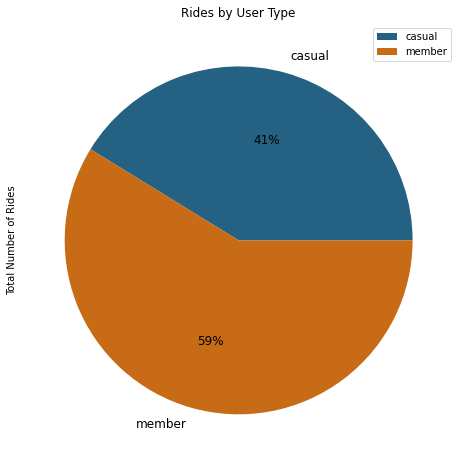

In [34]:
df['ride_id'].plot.pie(x='member_casual', ylabel='Total Number of Rides', title='Rides by User Type', legend=True,
                       autopct='%1.0f%%', fontsize='12', startangle=0, colors=['#246182', '#c76b16'], figsize=(10, 8))
plt.show()

<span style="font-size:1.1em;">This pie chart shows us that annual members represent the majority of Cyclistic's bike-sharing system users, making up for 59% of total users.

### **Visualizing Average Ride Length**

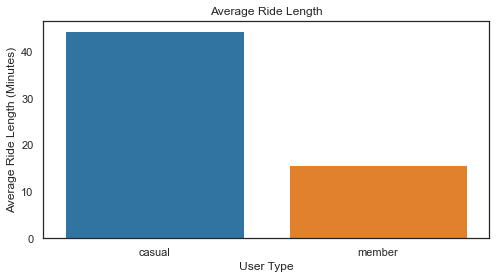

In [35]:
df1 = tripdata[['ride_length', 'member_casual']]
df1 = df1.groupby(['member_casual'], as_index=False)[['ride_length']].mean()

plt.figure(figsize = (8,4))
sns.set_theme(style='white')
sns.barplot(data=df1, x='member_casual', y='ride_length', palette='tab10').set_title('Average Ride Length')

plt.xlabel('User Type')
plt.ylabel('Average Ride Length (Minutes)')
plt.show()

<span style="font-size:1.1em;">The bar chart above shows us that casual riders have a much greater ride length average than members. The average ride length is **44 minutes** for casual riders and **16 minutes** for members.

### **Visualizing the Most Popular Rideable Type**

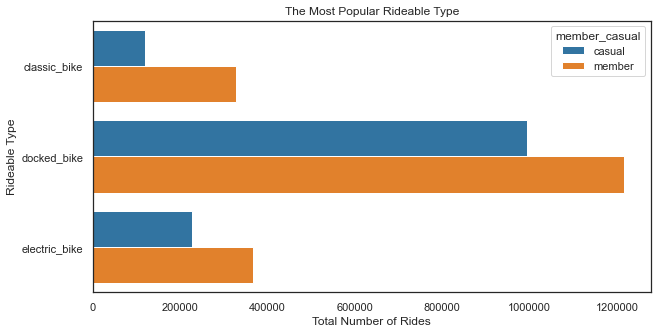

In [36]:
df2 = tripdata[['rideable_type', 'member_casual', 'ride_id']]
df2 = df2.groupby(['rideable_type', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (10,5))
sns.set_theme(style='white')
plt.ticklabel_format(style='plain', axis='x')
sns.barplot(x='ride_id', y='rideable_type', hue='member_casual', palette='tab10', data=df2).set_title('The Most Popular Rideable Type')

plt.xlabel('Total Number of Rides')
plt.ylabel('Rideable Type')
plt.show()

<span style="font-size:1.1em;">According to our dataset, Cyclistic's bikes are divided into three groups: *classic bike*, *docked bike*, and *electric bike*. It is clear in the visualization that **docked bike** is the most rented rideable type by both casual riders and members. This could either be explained by the users showing a preference for the docked type or, more plausibly, the company has invested more heavily in a docked-based system rather than the other two options.

### **Visualizing the Most Popular Day of the Week for Bike Rentals**

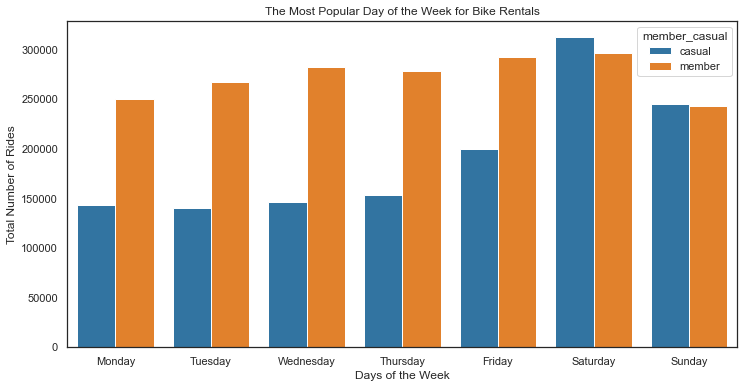

In [37]:
df3 = tripdata[['dayofweek', 'member_casual', 'ride_id']]
df3 = df3.groupby(['dayofweek', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (12,6))
sns.set_theme(style='white')
sns.barplot(data=df3, x='dayofweek', y='ride_id', hue='member_casual', palette='tab10',
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
                   'Sunday']).set_title('The Most Popular Day of the Week for Bike Rentals')

plt.xlabel('Days of the Week')
plt.ylabel('Total Number of Rides')
plt.show()

<span style="font-size:1.1em;">When it comes to bike rentals by day of the week, there are similarities and differences between casual riders and members. For instance, Saturday is the most popular day for both user types, and on Sunday their number of rides is very much the same. On the other hand, the two groups differ considerably when it comes to bike rentals throughout the weekdays: members consistently rent bikes on a daily basis while casual riders present lower weekday numbers compared to the weekend.

### **Visualizing the Most Popular Month of the Year for Bike Rentals**

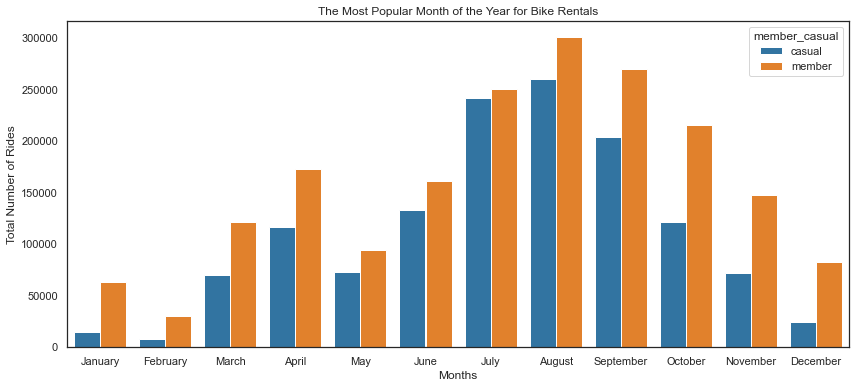

In [38]:
df4 = tripdata[['month', 'member_casual', 'ride_id']]
df4 = df4.groupby(['month', 'member_casual'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (14,6))
sns.set_theme(style='white')
sns.barplot(data=df4, x='month', y='ride_id', hue='member_casual', palette='tab10', 
            order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 
                   'October', 'November', 'December']).set_title('The Most Popular Month of the Year for Bike Rentals'),

plt.xlabel('Months')
plt.ylabel('Total Number of Rides')
plt.show()

<span style="font-size:1.1em;">Visualizing the number of rides per month can help us learn if seasonality plays a role in bike rental. The chart above shows us that the number of rentals increases during the summer months and gradually drops over the fall and winter for both user types. The main difference is that members are still more consistent with their rental habits throughout the year when compared to casual riders, whose numbers drop significantly during the winter months.

### **Visualizing Average Ride Length by Day of the Week**

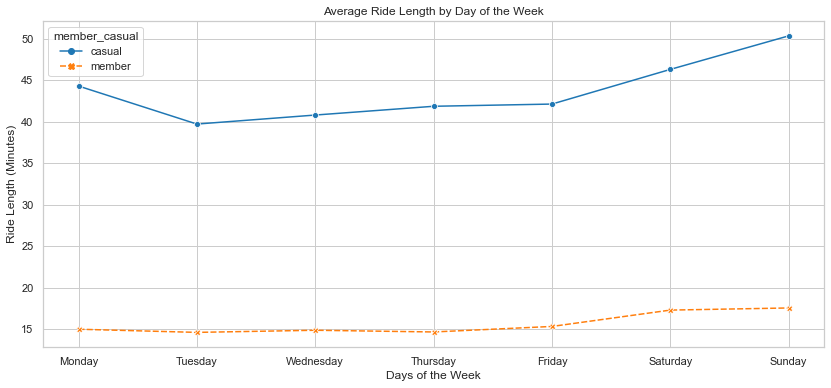

In [39]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
tripdata['dayofweek'] = tripdata['dayofweek'].astype(cat_type)
df5 = tripdata.copy()

df5 = tripdata[['dayofweek', 'member_casual', 'ride_length']]
df5 = df5.groupby(['dayofweek', 'member_casual'], as_index=False)[['ride_length']].mean()

sns.set_theme(style='whitegrid')
plt.figure(figsize = (14,6))
sns.lineplot(data=df5, x='dayofweek', y='ride_length', hue='member_casual', style='member_casual', palette='tab10', 
             markers=True).set_title('Average Ride Length by Day of the Week')

plt.xlabel('Days of the Week')
plt.ylabel('Ride Length (Minutes)')
plt.show()

<span style="font-size:1.1em;">On this line plot, it becomes clear that ride length increases on the weekends for the two groups. The difference between casual riders and members in this scenario lies in the duration of rides. Casual riders tend to take longer rides, averaging **44 minutes**. In contrast, members present much shorter rides that last **16 minutes** on average.
    
<span style="font-size:1.1em;">Considering the lack of personal user data for privacy reasons, it is difficult for us to determine exactly what causes casual riders and members to have such different riding lengths. It is likely that members live close to work/school and choose to commute using Cyclistic's bike-sharing system. As for casual riders, if we take into consideration that they purchase either single-ride or full-day passes, this makes them less likely to use the service on a daily basis as members do. Casual riders could have longer ride lengths because they are using it for leisure or tourism. Regardless, we are unable to answer this question with certainty ride length increases on the weekends for the two groups given the gaps in our data.

### **Visualizing Average Ride Length by Month**

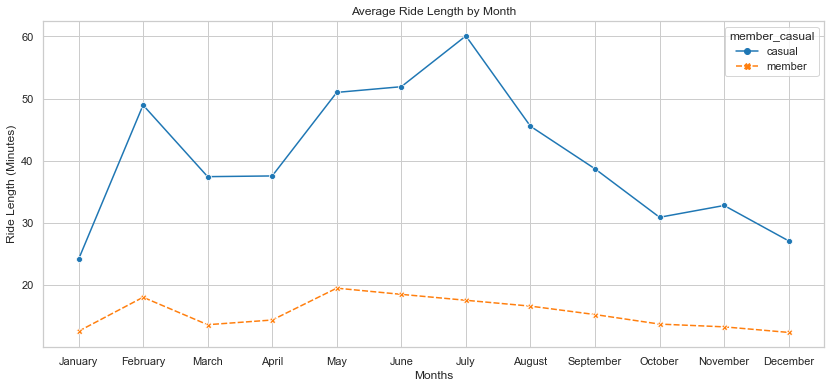

In [40]:
cats = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
cat_type = CategoricalDtype(categories=cats, ordered=True)
tripdata['month'] = tripdata['month'].astype(cat_type)
df6 = tripdata.copy()

df6 = tripdata[['month', 'member_casual', 'ride_length']]
df6 = df6.groupby(['month', 'member_casual'], as_index=False)[['ride_length']].mean()

sns.set_theme(style='whitegrid')
plt.figure(figsize = (14,6))
sns.lineplot(data=df6, x='month', y='ride_length', hue='member_casual', palette='tab10', 
             style='member_casual', markers=True).set_title('Average Ride Length by Month')

plt.xlabel('Months')
plt.ylabel('Ride Length (Minutes)')
plt.show()

<span style="font-size:1.1em;">When we visualize ride length by month, we can learn more about the user's riding habits throughout the year. Note that the ride length changes considerably for casual riders as the months go by. For this type of customer, the ride length peaks during the summer – reaching an average of **60 minutes** in July – before dropping in August. As for the members, the ride length does not change drastically over the months, peaking in May – averaging **18 minutes** – and then gradually dropping for the remainder of the year. 
    
<span style="font-size:1.1em;">Considering the short trips, this could indicate that members use Cyclistic's bikes to commute and, perhaps, run errands. The drop in ride length over the winter months could indicate that members choose other means of transportation to commute during that time of the year. In contrast, casual riders could be using it for leisure or tourism – as mentioned earlier – especially during the spring and summer.

### **Visualizing the Total Number of Rides per Hour**

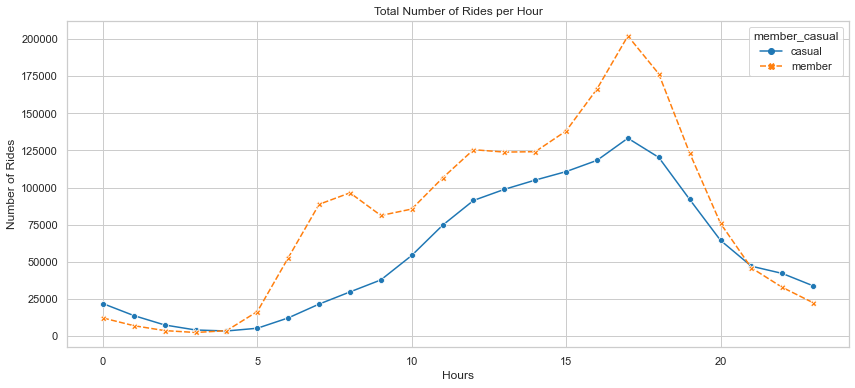

In [41]:
df7 = tripdata[['hour', 'member_casual', 'ride_id']]
df7 = df7.groupby(['hour', 'member_casual'], as_index=False)[['ride_id']].count()

sns.set_theme(style='whitegrid')
plt.figure(figsize = (14,6))
sns.lineplot(data=df7, x='hour', y='ride_id', hue='member_casual', palette='tab10',
             style='member_casual', markers=True).set_title('Total Number of Rides per Hour')
plt.xlabel('Hours')
plt.ylabel('Number of Rides')
plt.show()

<span style="font-size:1.1em;">By taking a closer look into the total number of rides per hour, we can find more patterns in the customers' bike rental habits. The number of bike rentals by casual riders begins to increase between **8 am** and **10 am**, peaking at **5 pm**. As for members, the numbers start to go up earlier – between **6 am** and **7 am** – also peaking at **5 pm**. Note that the number of rides by members is far greater than casual riders. This could be related to the fact that members represent the majority of users and likely use Cyclistic's services for their daily commute.

## **6. ACT**

Now, it is time to summarize our key findings and present our recommendations for Cyclistic's marketing team.

### **Key Findings** 

* <span style="font-size:1.1em;">Annual members are the majority of users, making up for 59% of Cyclistic's customers.
* <span style="font-size:1.1em;">Casual riders have an average ride length of 44 minutes while members take shorter trips, averaging 16 minutes.
* <span style="font-size:1.1em;">Docked bike is the most popular rideable type for both groups, followed by classic and electric bikes, respectively.
* <span style="font-size:1.1em;">Saturday is the most popular day of the week for bike rentals.
* <span style="font-size:1.1em;">Casual riders, as well as members, take longer rides on the weekends.
* <span style="font-size:1.1em;">Members consistently rent bikes on a daily basis while casual riders present lower weekday numbers compared to the weekend.
* <span style="font-size:1.1em;">August is the most popular month of the year for bike rental. There’s a clear rise in numbers during the summer for both casual riders and members.
* <span style="font-size:1.1em;">Both user types take longer rides during the spring and summer months.  
* <span style="font-size:1.1em;">The number of bike rentals by casual riders begins to grow between 8 am and 10 am, peaking at 5 pm. As for members, the numbers start to go up earlier – between 6 am and 7 am – also peaking at 5 pm.         
* <span style="font-size:1.1em;">Average ride length combined with the average time of day rentals indicates that members use Cyclistic's bikes to go to work/school. The noticeable drop in ride length over the winter could be related to a change in means of transportation to commute during that time of year.
* <span style="font-size:1.1em;">Casual riders' bike rental numbers on the weekends paired with average ride length during the summer suggest that they are using the single-ride and full-day passes for leisure or tourism.

#### **After conducting analysis with the support of visualizations, it became clear how casual riders and members use Cyclistic bikes differently:** 
* <span style="font-size:1.1em;">**Casual riders** tend to rent more bikes on the weekends – especially over the summer. Considering the long average ride length, this combination of factors suggests that this group of customers use the bikes for leisure.
* <span style="font-size:1.1em;">**Members** tend to use Cyclistic's bike-sharing system on a daily basis for shorter rides, indicating its use for commuting to work/school and running errands on the weekends. 
    

### **Recommendations**

<span style="font-size:1.1em;">The following recommendations were carefully created to help guide Cyclistic's marketing strategy:

* <span style="font-size:1.1em;">Increase marketing campaign targeted at casual riders through email, text messages, and app notifications during the summer months, when bike rental is more frequent. The ads could offer special discounts for the annual membership in order to encourage casual riders to make the switch.
    
* <span style="font-size:1.1em;">Create a rewards points system for members, where each bike rental adds up a certain number of points to the user’s account. The points could get higher with rental frequency and trip duration, and at the end of each year, the user could exchange the points for a discount on membership renewal.   
    
* <span style="font-size:1.1em;">Cyclistic could study partnering up with local companies and offer special deals on places such as fitness centers, movie theaters, beauty salons, and restaurants. Focusing on entertainment and wellness segments could motivate casual riders into signing up for the annual membership. 

* <span style="font-size:1.1em;">Given that casual riders do not rent bikes as much as members during the weekdays, Cyclistic’s marketing team should also consider the possibility of creating two new types of membership: 

    - <span style="font-size:1.1em;">An annual membership that only includes the weekends. This way, the customers that only rent bikes twice a week could pay accordingly and still add to the company’s growing number of members. 
    - <span style="font-size:1.1em;">A seasonal membership tailored for the group of people that likes to ride bikes during the summer, but do not have any interest in renting it for the remainder of the year. This type of membership could be billed annually, and offer a special discount in comparison to the single-ride and full-day passes.

### **Additional Considerations**

<span style="font-size:1.1em;">Given the fact that we encountered certain gaps in our data, such as the lack of payment, age, gender, and geographical information, we are unable to make further recommendations. Demographic data plays a significant role in creating a successful marketing campaign because it allows businesses to understand their audience better. Once the company has this information, they can segment their customers into separate groups based on their habits, interests, and other important characteristics. This way, the marketing team is able to create customized ad campaigns capable of achieving Cyclistic’s marketing and financial goals.
 
